### Question 2

True Proportions vs Observed Proportions and Weights:
   age_group  gender  true_proportion  observed_proportion     weight
0    under18    male         0.113944             0.004366  26.097157
1     18to24    male         0.046796             0.017074   2.740824
2     25to34    male         0.071139             0.017074   4.166553
3     35to44    male         0.063340             0.019082   3.319387
4     45to54    male         0.061481             0.025658   2.396188
5     55to64    male         0.062456             0.042974   1.453336
6     65plus    male         0.073363             0.055493   1.322016
7    under18  female         0.109088             0.012452   8.760935
8     18to24  female         0.044767             0.043850   1.020914
9     25to34  female         0.068793             0.058835   1.169248
10    35to44  female         0.063553             0.091649   0.693439
11    45to54  female         0.063066             0.127926   0.492985
12    55to64  female         0.06684

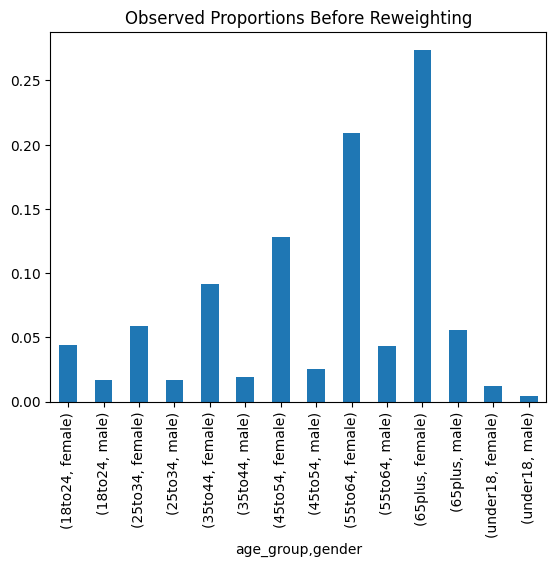

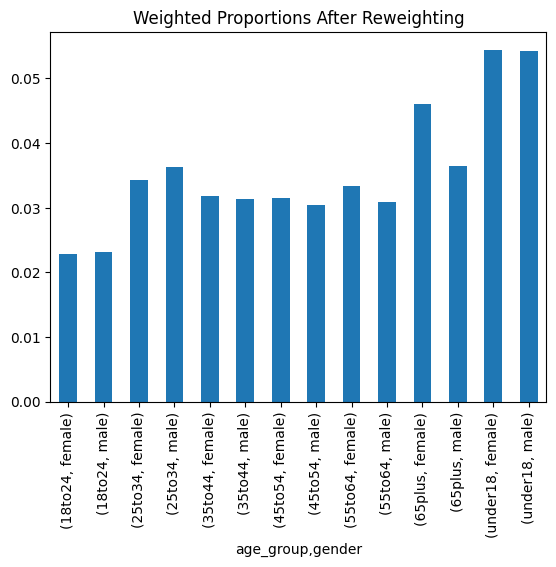

   user_id age_group  gender  income_decile  home_ownership_flag  \
0        1    65plus  female              3                    1   
1        2    65plus  female              8                    1   
2        3    65plus  female              7                    0   
3        4    55to64    male              3                    0   
4        5    65plus    male              3                    1   

   car_ownership_likelihood    weight  weighted  
0                  0.148788  0.333376  0.049602  
1                  0.457446  0.333376  0.152502  
2                  0.364803  0.333376  0.121617  
3                  0.856991  1.453336  1.245496  
4                  0.901790  1.322016  1.192181  


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = 'take_home_assessment.xlsx'
q2_data = pd.read_excel(file_path, sheet_name='Q2')
demographic_proportions = pd.read_excel(file_path, sheet_name='Demographic_Proportions')

# Addressing Sampling Bias in Q2:
# 1. Calculate observed proportions in the input data.
observed_proportions = q2_data.groupby(['age_group', 'gender']).size() / len(q2_data)

# 2. Merge observed proportions with true demographic proportions.
merged_proportions = demographic_proportions.rename(columns={"proportion": "true_proportion"}).merge(
    observed_proportions.reset_index(name='observed_proportion'),
    on=['age_group', 'gender'],
    how='left'
)

# 3. Calculate weights as true proportion / observed proportion.
merged_proportions['weight'] = merged_proportions['true_proportion'] / merged_proportions['observed_proportion']

# 4. Apply weights to the input data.
q2_data = q2_data.merge(merged_proportions[['age_group', 'gender', 'weight']], on=['age_group', 'gender'], how='left')

# Step 1: Verify Adjusted Weights
print("True Proportions vs Observed Proportions and Weights:")
print(merged_proportions[['age_group', 'gender', 'true_proportion', 'observed_proportion', 'weight']])

# Step 2: Visualize the Effect of Reweighting
# Before Reweighting
data_before = q2_data.groupby(['age_group', 'gender']).size() / len(q2_data)
data_before.plot(kind='bar', title='Observed Proportions Before Reweighting')
plt.show()

# After Reweighting (Weighted Proportions)
q2_data['weighted'] = q2_data['weight'] * q2_data['car_ownership_likelihood']
data_after = q2_data.groupby(['age_group', 'gender'])['weighted'].sum() / q2_data['weight'].sum()
data_after.plot(kind='bar', title='Weighted Proportions After Reweighting')
plt.show()

# Display reweighted Q2 data (first few rows)
print(q2_data.head())


### Addressing Demographic Bias in the Input Data

To address demographic bias in the input data, the following steps were performed:

#### 1. Understand the Problem:
The demographic distribution of the input data differs from the true demographic distribution provided. This introduces bias, which can affect model performance and generalizability.

#### 2. Calculate Observed and True Proportions:
- Observed proportions were computed from the input data by grouping the records by demographic categories (e.g., age group and gender).
- These were compared with the true proportions provided in the "Demographic_Proportions" sheet.

#### 3. Compute Weights:
- For each demographic group, a weight was calculated as:
  ```
  Weight = True Proportion / Observed Proportion
  ```
- Groups that were underrepresented in the input data received higher weights, while overrepresented groups received lower weights.

#### 4. Reweight the Data:
- These weights were applied to the input data to align its demographic distribution with the true population distribution.
- Visualizations were created to compare the demographic proportions before and after reweighting.

#### 5. Incorporate Weights in Model Training:
- The computed weights can be used during model training as **sample weights** to ensure the model accounts for the adjusted demographic distribution.

---

### Outcome and Key Insights:
- **Verification**: The weights ensure that underrepresented groups are appropriately amplified, and overrepresented groups are scaled down.
- **Impact**: The weighted data more closely matches the true demographic distribution, reducing bias.
- **Next Steps**: Use the weighted data for training the model, ensuring fairer and more accurate predictions.

---

### Simpler Explanation:
“Imagine we have more data about older men than young women, but in reality, young women form a larger part of the population. We calculate adjustment factors to give more importance to young women and less to older men in our dataset, so our model learns from data that better represents the real-world population.”
